<table width=100%>
    <tr>
        <td width = 40% align = "left">
            <h3> MTH786 Machine Learning with Python</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Semester A </h3>
        </td>
    </tr>
    <tr>
        <td width = 40% align = "left">
            <h3> Lab Coursework 4</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Dr Nicola Perra </h3>
        </td>
    </tr>
</table>

We start by loading necessary libraries, including NumPy (used for linear algebra calculations) and MatPlotLib (used for visualisation).

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear regression
By completing this exercise you will write a set of functions that are used for building a linear regression for a given data samples. You will then finish by calculating a linear regression for a height-weight dataset. 


1. Implement function **linear_regression_data** that computes (and outputs) the linear regression data matrix defined as
$$
\mathbf{X} = 
\begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \vdots & \ddots & \vdots & \\
1 & x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}
$$
The function **linear_regression_data**  should take the NumPy array *data_inputs* as argument. Here, *data_inputs* is supposed to be a data matrix containing all inputs in the matrix form as follows
$$
data\_inputs = 
\begin{pmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots & \vdots & \ddots & \vdots & \\
x^{(s)}_1 & x^{(s)}_2 & \ldots & x^{(s)}_d \\
\end{pmatrix}.
$$
The function should output data matrix $\mathbf{X}$.

In [83]:
def linear_regression_data(data_inputs):
    first_column=np.ones((len(data_inputs),1))
    X_matrix = np.c_[first_column,data_inputs]
    return X_matrix

Test your function with the following unit tests

In [84]:
from numpy.testing import assert_array_almost_equal, assert_array_equal
test_inputs = np.array([[1], [2], [3], [4]])
assert_array_equal(linear_regression_data(test_inputs), 
                   np.array([[1, 1], [1, 2], [1, 3], [1, 4]]))

In [85]:
test_inputs = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
assert_array_equal(linear_regression_data(test_inputs), np.array([[1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5]]))

Try your function with this random samples

In [86]:
samples, dimensions = np.random.randint(low = 2, high = 10,size = 2)
test_inputs = np.random.rand(samples, dimensions)

print (samples,dimensions)
print (test_inputs)

4 5
[[0.37529387 0.03444216 0.39100691 0.81027408 0.71626487]
 [0.18264834 0.19126842 0.7329569  0.02167626 0.35227111]
 [0.50654898 0.15480317 0.46850894 0.74099581 0.95315541]
 [0.89409842 0.36277684 0.34789671 0.05725254 0.43168103]]


2. Write a function **linear_regression** that takes two arguments *data_matrix* and *data_outputs*, which computes and returns the solution $\hat{\mathbf{W}}$ of the normal equation
$$
\mathbf{X}^{\top}\mathbf{X} \hat{\mathbf{W}} = \mathbf{X}^{\top}\mathbf{Y}
$$
Here $\mathbf{X}$  is the mathematical representation of *data_matrix*
and $\mathbf{Y}$ is the mathematical representation of *data_outputs*, while $\hat{\mathbf{W}}$ is a mathematical representation for weights/coefficients of the linear regression.

**Hint**: you the function np.linalg.solve
https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

In [87]:
def linear_regression(data_matrix, data_outputs):
    a=data_matrix.T@data_matrix
    b=data_matrix.T@data_outputs
    return np.linalg.solve(a, b)

Let's try an example with the following data

$(x^{(1)},y^{1})=(0.5,1)$

$(x^{(2)},y^{2})=(\frac32,0)$

We can plot it

In [88]:
data=[0.5, 1.5]
output=[1,0]
# first step: build the data matrix
data_matrix = linear_regression_data(data)

# now we can call the regression function

w = linear_regression(data_matrix, output)

print (w)
# these are the optimal weights!

[ 1.5 -1. ]


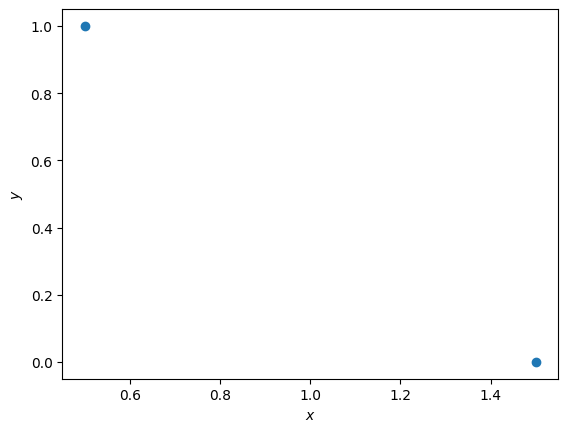

In [89]:
plt.scatter(data,output)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

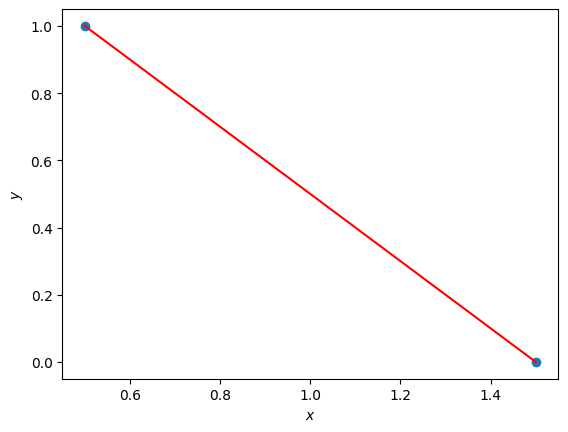

In [90]:
# the predicted models is then

y_predict=data_matrix@w


plt.scatter(data,output)
plt.plot(data,y_predict,color="Red")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Test your function with the following unit tests

In [91]:
test_data_matrix = np.array([[1,0.98],[1,1.02]])
test_outputs = np.array([[-0.1],[0.3]])
assert_array_almost_equal(linear_regression(test_data_matrix, test_outputs),
                          np.array([[-9.9], [10]]))

3. Write a function **prediction_error** that evaluates a mean-squared error over the set of data inputs and outputs. The function **prediction_error** takes the arguments _data_matrix_, _data_ouputs_ and _weights_ as inputs and returns a mean squared error defined by
$$
\mathrm{MSE} = \frac{1}{2s} \left\|\mathbf{X}\mathbf{W} - \mathbf{Y} \right\|^2,
$$
where $\mathbf{X}$ is a mathematical representation of _data_matrix_, $\mathbf{Y}$ is a mathematical representation of _data_outputs_ and $\mathbf{W}$ is a mathematical representation of _weights_.

In [92]:
def prediction_error(data_matrix,data_outputs,weights):
    inside=data_matrix@weights-data_outputs
    return np.linalg.norm(inside)**2/(2.*(len(data_outputs)))

Test your function with the following unit tests

In [93]:
test_data_matrix = np.array([[1,0.98],[1,1.02]])
test_data_outputs = np.array([[-0.1],[0.3]])
test_weights = np.array([[-9.9],[10]])
assert_array_almost_equal(prediction_error(test_data_matrix, test_data_outputs, test_weights), 0)

In [94]:
test_data_matrix = np.array([[1,1,-1],[1,2,2]])
test_data_outputs = np.array([[-1,2],[1,3]])
test_weights = np.array([[0,0],[1,2],[3,4]])
assert_array_almost_equal(prediction_error(test_data_matrix, test_data_outputs, test_weights), 36.75)

4. In the next two parts we apply the above to height-weight-gender data, considered in the lectures. Our goal is to build a linear regression for a weight as a function of height or height and gender. We start by reading the data from attached .csv file.   **Important:** please check that the file *height_weight_genders.csv* is located in the same folder with your Jupyter notebook.

In [95]:
converter_function=lambda x: 0 if "Male" in x else 1

genders = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[0], \
                        converters={0:converter_function}) # 0 here is the reference to the column
heights = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[1])
weights = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[2])

print (genders)
print (heights)
print (weights)

[0 0 0 ... 1 1 1]
[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


Lambda functions are very powerful and compact, perfect to be used in concert with others. In their general form the lambda function is 

lambda arguments: expression

the function takes some arguments and evaluate some expression

Let us first build a scatter plot of weight-height data (excluding gender).

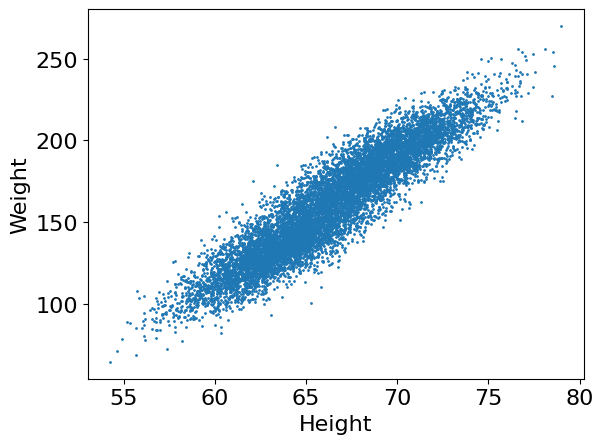

In [96]:
# YOUR CODE HERE
plt.scatter(heights, weights, s = 1)
plt.xlabel('Height', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

In the next cell you use the functions defined above to find optimal regression weights. You then asked to evaluate your training error and plot a linear regression together with the scatter plot above.

In [97]:
# YOUR CODE HERE
data_inputs = heights
data_outputs = weights
data_matrix = linear_regression_data(data_inputs)
regression_weights = linear_regression(data_matrix, data_outputs)

Test your results with the following unit tests

In [98]:
assert_array_almost_equal(regression_weights,np.array([-350.737192, 7.717288]))

Print the prediction error below

In [99]:
# WRITE YOUR CODE HERE
print (prediction_error(data_matrix,data_outputs,regression_weights))

74.6467419745648


Add a plot of linear regression (in red color) to the above scatter plot.

In [100]:
print (regression_weights)

[-350.73719181    7.71728764]


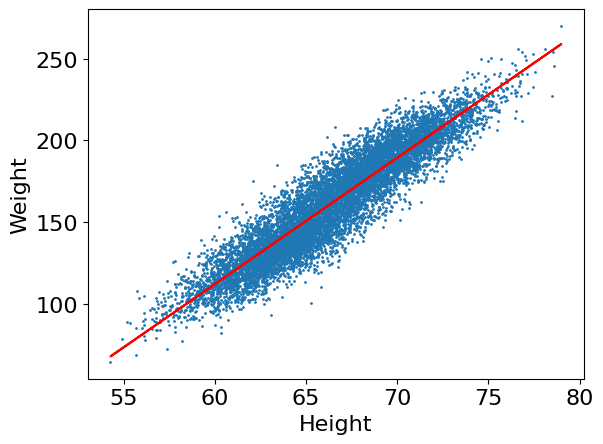

In [101]:
# YOUR CODE HERE
y_predict=data_matrix@regression_weights

plt.scatter(heights, weights, s = 1)
plt.plot(heights,y_predict,c='Red')
plt.xlabel('Height', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

6. In this part we include gender parameter to our linear regression. This means that now you are predicting a weight of the person by using his/her height and gender data. As before we start with the scatter plot, which is now a 3D one.

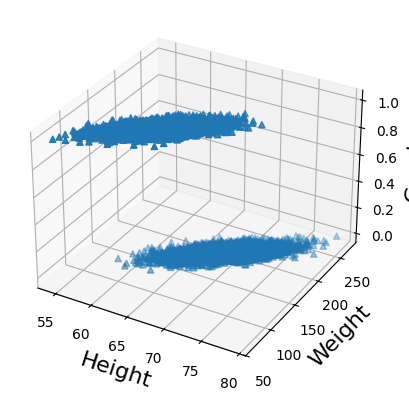

In [102]:
# YOUR CODE HERE
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(heights, weights, genders, marker="^")
ax.set_xlabel('Height', fontsize=16)
ax.set_ylabel('Weight', fontsize=16)
ax.set_zlabel('Gender', fontsize=16)
plt.show()

In the next cell you use the functions defined above to find optimal regression weights. You then asked to evaluate your training error and plot a linear regression together with the scatter plot above. In doing so, now your inputs it is not just the weights but also gender

In [103]:
# YOUR CODE HERE
data_inputs = np.c_[heights, genders]
data_outputs = weights
data_matrix = linear_regression_data(data_inputs)
regression_weights = linear_regression(data_matrix, data_outputs)

Test your function with the following unit tests

In [104]:
assert_array_almost_equal(regression_weights,np.array([-225.545792,    5.976941,  -19.377711]))

What is the prediction error?

In [105]:
print (prediction_error(data_matrix, data_outputs, regression_weights))

50.12596268768962
